In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.metrics import accuracy_score
from resnet50_mlp_fusion import SupCEResNet_Fusion  
from train import train_model
from data_preprocessing import get_data_loaders
import torch.nn as nn
import torch.optim as optim
from train import train_model

# Device configuration
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Define model
model = SupCEResNet_Fusion(
    name='resnet50',
    num_classes=1,  # Regression or binary classification
    num_features=14,  # Number of biomarkers
    in_channels=3  # RGB images
).to(DEVICE)

# Define the criterion and optimizer
criterion = nn.MSELoss()  # Use MSELoss for regression tasks
optimizer = optim.Adam(model.parameters(), lr=1e-4)
train_loader, val_loader = get_data_loaders()
# Train the model
train_losses, val_losses = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=DEVICE,
    epochs=15  # Specify the number of epochs
)


Epoch 1/15 - Train Loss: 359.9339, Val Loss: 24.3332
Epoch 2/15 - Train Loss: 16.6890, Val Loss: 11.9235
Epoch 3/15 - Train Loss: 10.4118, Val Loss: 7.0489
Epoch 4/15 - Train Loss: 7.8965, Val Loss: 12.7425
Epoch 5/15 - Train Loss: 6.1411, Val Loss: 4.1106
Epoch 6/15 - Train Loss: 5.1072, Val Loss: 4.7286
Epoch 7/15 - Train Loss: 4.5260, Val Loss: 3.0286
Epoch 8/15 - Train Loss: 3.5107, Val Loss: 2.5087
Epoch 9/15 - Train Loss: 3.3327, Val Loss: 2.0824
Epoch 10/15 - Train Loss: 2.9979, Val Loss: 3.0033
Epoch 11/15 - Train Loss: 2.4394, Val Loss: 3.3278
Epoch 12/15 - Train Loss: 2.5987, Val Loss: 2.0882
Epoch 13/15 - Train Loss: 2.4252, Val Loss: 1.8262
Epoch 14/15 - Train Loss: 1.8684, Val Loss: 1.9394
Epoch 15/15 - Train Loss: 1.9153, Val Loss: 2.6739


In [4]:
torch.save(model, "resnet50.pth")

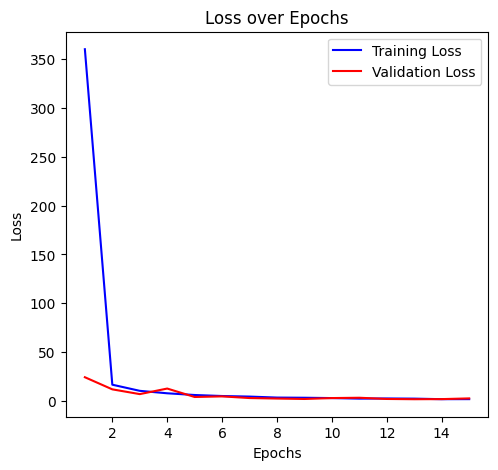

In [6]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_losses) + 1)

# Training loss + validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Training Loss", color="blue")
plt.plot(epochs, val_losses, label="Validation Loss", color="red")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()